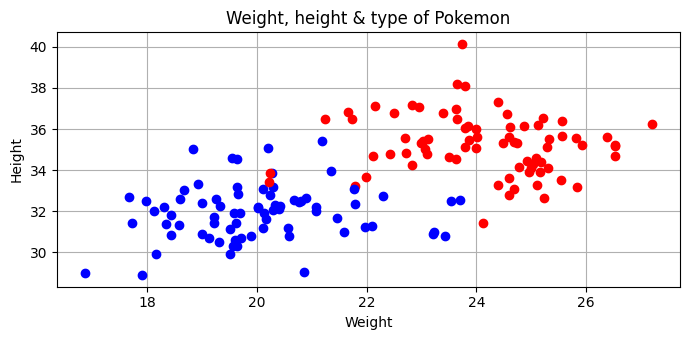

In [68]:
import matplotlib.pyplot as plt # needed for our graphs
import numpy as np
import math

with open ("../Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines.pop(0) # removes first line in the list

    # Create 3 lists in order to separate each line and append correct info with corresponding list
    poke_width = [] # list with width numbers
    poke_height = [] # list with height numbers
    poke_type = [] # list with types

    # First for loop goes through every line in the text document, second for loop goes through every split.
    for label in lines:
        w, h, t = [eval(_) for _ in label.split(",")] # convert to float and splits on ",", which makes 3 splits on each line
        # 'eval' in this case evaluates if the string input can be converted to an integer or a float. 
        # Since it's numbers in a string format for our use, it can be converted to float.
        # Source: https://www.mygreatlearning.com/blog/eval-in-python/

        poke_width.append(w) # first split is appended to width list
        poke_height.append(h) # second split is appended to height list
        poke_type.append(t)  # third split is appended to type list
    
    def grid_plot():
        for ww, hh, tt,  in zip(poke_width, poke_height, poke_type): # Create 3 new variables that is ziped with our split lists.
                # Zip lets us merge width, height and type list onto a new variable, 
                # which is needed for us to be able to display the type color on the graph
            if tt == 0: 
                pallet = "blue" # checks if the value of 'type' is 0 or 1. 
            else:               # changes 'pallet' color, which makes the graph much more readable
                pallet = "red"
            plt.plot(ww, hh, "o", color=pallet) # plt.plot needs to be in for loop in order for every point to be plotted

        plt.title("Weight, height & type of Pokemon") # titles and labels
        plt.xlabel("Weight") 
        plt.ylabel("Height") 
        plt.grid() # Gives graph a grid (easier to read)
    
    grid_plot()

    def euclidian_distance(point1, point2):
        distance = math.dist([point1], [point2])




In [ ]:
from turtle import width
import matplotlib.pyplot as plt # needed for our graphs
import numpy as np
import math

with open ("../Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines.pop(0) # removes first line in the list

    # Create 3 lists in order to separate each line and append correct info with corresponding list
    poke_width = [] # list with width numbers
    poke_height = [] # list with height numbers
    poke_type = [] # list with types

    # First for loop goes through every line in the text document, second for loop goes through every split.
    for label in lines:
        w, h, t = [eval(_) for _ in label.split(",")] # convert to float and splits on ",", which makes 3 splits on each line
        # 'eval' in this case evaluates if the string input can be converted to an integer or a float. 
        # Since it's numbers in a string format for our use, it can be converted to float.
        # Source: https://www.mygreatlearning.com/blog/eval-in-python/

        poke_width.append(w) # first split is appended to width list
        poke_height.append(h) # second split is appended to height list
        poke_type.append(t)  # third split is appended to type list
    
    def grid_plot():
        for ww, hh, tt,  in zip(poke_width, poke_height, poke_type): # Create 3 new variables that is ziped with our split lists.
                # Zip lets us merge width, height and type list onto a new variable, 
                # which is needed for us to be able to display the type color on the graph
            if tt == 0: 
                pallet = "blue" # checks if the value of 'type' is 0 or 1. 
            else:               # changes 'pallet' color, which makes the graph much more readable
                pallet = "red"
            plt.plot(ww, hh, "o", color=pallet) # plt.plot needs to be in for loop in order for every point to be plotted

        plt.title("Weight, height & type of Pokemon") # titles and labels
        plt.xlabel("Weight") 
        plt.ylabel("Height") 
        plt.grid() # Gives graph a grid (easier to read)
    
    grid_plot()

    n1 = float(input("Enter the width"))
    n2 = float(input("Enter the width"))

    def euclidian_distance(point1: float, point2: float):
        E_D = math.dist(point1, point2)
        print (E_D)
    
    euclidian_distance(n1, n2)





In [67]:
n1 = float(input("Enter the width"))
n2 = float(input("Enter the width"))

E_D = math.dist(n1[float], n2[float])
print(E_D)



TypeError: 'float' object is not subscriptable